### Checking Model Details

In [0]:

!saved_model_cli show --dir {"/serving/models/1"} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_conv2d_1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_7'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict


### Libraries for TF Serving

In [0]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2343  100  2343    0     0  16158      0 --:--:-- --:--:-- --:--:-- 16158
OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1

In [0]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 56 not upgraded.
Need to get 136 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 1.13.0 [136 MB]
Fetched 136 MB in 2s (66.8 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 131322 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_1.13.0_all.deb ...
Unpacking tensorflow-model-server (1.13.0) ...
Setting up tensorflow-model-server (1.13.0) ...


### Running the Model Server

In [0]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8511 \
  --model_base_path="/serving/models/" >server.log 2>&1

Starting job # 16 in a separate thread.


In [75]:
!tail server.log 

2019-03-10 14:30:37.577158: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-03-10 14:30:37.592993: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:182] Restoring SavedModel bundle.
2019-03-10 14:30:37.639804: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:132] Running initialization op on SavedModel bundle.
2019-03-10 14:30:37.643926: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:285] SavedModel load for tags { serve }; Status: success. Took 68804 microseconds.
2019-03-10 14:30:37.644002: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:101] No warmup data file found at /serving/models/1/assets.extra/tf_serving_warmup_requests
2019-03-10 14:30:37.644120: I tensorflow_serving/core/loader_harness.cc:86] Successfully loaded servable version {name: default version: 1}
2019-03-10 14:30:37.645449: I tensorfl

### Simulating REST API Request

Loading the dataset

In [0]:
!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds




datasets, ds_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = datasets['train'], datasets['test']

BATCH_SIZE = 3
BUFFER_SIZE=3

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    
    return image, label

train_data = mnist_train.map(scale).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).take(5)
test_data = mnist_test.map(scale).batch(BATCH_SIZE).take(5)



In [95]:
image_batch, label_batch = next(iter(train_data))
image_batch[0:3].numpy().tolist()

[[[[0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0]],
  [[0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0]],
  [[0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0]],
  [[0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0],
   [0.0

Building Request Object

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


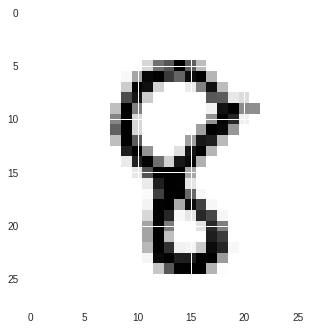

In [105]:


import json
data = json.dumps({"signature_name": "serving_default", "instances": image_batch[0:3].numpy().tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))


Results of API request (the labels predicted and the respective images)

<Response [200]>
8
9


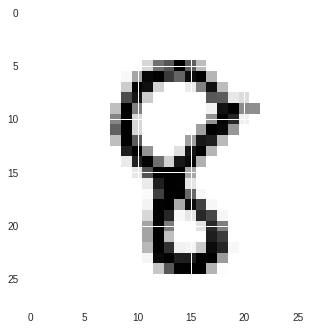

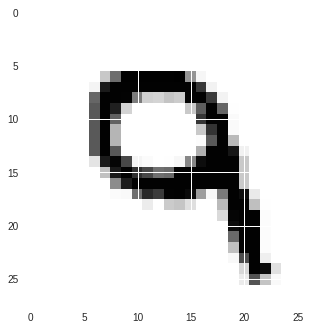

In [109]:
!pip install -q requests
import numpy as np
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8511/v1/models/default:predict', data=data, headers=headers)
print(json_response)
predictions = json.loads(json_response.text)['predictions']

class_name=[0,1,2,3,4,5,6,7,8,9]
plt.figure()
plt.imshow(image_batch[0].numpy().reshape(28,28))
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(image_batch[1].numpy().reshape(28,28))
print(class_names[np.argmax(predictions[1])])